In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
import scipy.io as sp
from sklearn.ensemble import IsolationForest, BaggingClassifier

dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']
#print(y)

In [5]:


Comtam = [0.3,0.5]
Comtam
AUC1=0




plage_contamination = np.arange (0.01, 0.51, 0.01)
maxfeatures = np.arange(5, 10, 1)
MS=[100]
nombre_estim = np.arange(250,350,50) #permet de créer une liste de int de 1 à 100 pour faire varier le nombre d'estimateur dans la boucle for 
maxfeatures
#nombre_estim


array([5, 6, 7, 8, 9])

In [6]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import xlsxwriter
import numpy as np
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

# workbook = xlsxwriter.Workbook('results_data.xlsx')
# worksheet = workbook.add_worksheet()
# matrice=np.array([['contamination'],['Nb estimateur'],['maxSamples'],['BootStrap'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
#faire varier nb de fold ?
# i=0
# col=0
skf = StratifiedKFold(n_splits=2) 
data = np.array([['Nombre estimateur','Max Samples','Contamination','MaxFeature','F1 score','recall','precision','accuracy','AUC','numero_fold']])
fold=0
for train_index, test_index in skf.split(X, y):
        fold=fold+1
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        for estim in nombre_estim:
                for maxsamples in MS:
                        for C in Comtam:
                                for MF in maxfeatures:
                                        model = IsolationForest(contamination=C, n_estimators=estim, max_features=MF, max_samples=maxsamples)
                                        model.fit(X_train)
                                        y_pred=model.predict(X_test)
                                        y_pred[y_pred>0]=0
                                        y_pred[y_pred<0]=1
                                        F1=round(f1_score(y_test,y_pred),3)
                                        recall=round(recall_score(y_test,y_pred),3)
                                        precision=round(precision_score(y_test,y_pred,zero_division=0),3)
                                        accuracy=round(accuracy_score(y_test,y_pred),3)
                                        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
                                        roc_auc = metrics.auc(fpr, tpr)
                                        data = np.append(data, [[estim,maxsamples,C,MF,F1,recall,precision,accuracy,roc_auc,fold]],axis=0)
                                        #AUC2=roc_auc
                                        #matrice = np.append(matrice,np.array([C,int(estim),maxsamples,"{}".format(B),F1,recall,precision,accuracy,AUC2]).reshape(9,1),axis=1)
                                        # if AUC2>AUC1:
                                        #         AUC1=AUC2
                                        #         ContaminationP=C
                                        #         estimP=estim
                                        #         BootP=B
                                        #         MSP=maxsamples



                                                #     fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
                                                #     roc_auc = metrics.auc(fpr, tpr)
                                                #     plt.subplot(211)
                                                #     plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
                                                #     #plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
                                                #     plt.xlim([0.0, 1.0])
                                                #     plt.ylim([0.0, 1.0])
                                                #     plt.xlabel('False Positive Rate or (1 - Specifity)')
                                                #     plt.ylabel('True Positive Rate or (Sensitivity)')
                                                #     plt.title('Receiver Operating Characteristic')
                                                #     plt.legend(loc="lower right")
                                                #     plt.subplot(212)
                                                #     precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
                                                #     plt.plot(recall, precision)
                                                #     plt.xlabel('Recall')
                                                #     plt.ylabel('Precision')
                                                #     #y_pred1=model.fit_predict(X_test) #Comparaison du .predict et du .fit_predict
                                                #     # #y_pred1[y_pred1>0]=0
                                                #     # #y_pred1[y_pred1<0]=1
                                                #     # #print(".predict") #Comparaison du .predict et du .fit_predict
                                                #     #print(classification_report(y_test,y_pred))
                                                #     # print(confusion_matrix(y_test, y_pred))
                                                #     # #print("fit_predict")
                                                #     # #print(classification_report(y_test,y_pred1))
                                                #     # #print(confusion_matrix(y_test, y_pred1))

#         for row, data in enumerate(matrice):
#                 worksheet.write_row(row+i*10, col, data)
#         i=i+1
        
# workbook.close()
                                           
# print (AUC1)
# print (ContaminationP)
# print (estimP)
# print (BootP)
# print (maxsamples)
data


array([['Nombre estimateur', 'Max Samples', 'Contamination',
        'MaxFeature', 'F1 score', 'recall', 'precision', 'accuracy',
        'AUC', 'numero_fold'],
       ['250.0', '100.0', '0.3', '5.0', '0.887', '0.883', '0.891',
        '0.921', '0.9123873873873874', '1.0'],
       ['250.0', '100.0', '0.3', '6.0', '0.885', '0.867', '0.904',
        '0.921', '0.9085585585585585', '1.0'],
       ['250.0', '100.0', '0.3', '7.0', '0.891', '0.883', '0.898',
        '0.924', '0.9146396396396396', '1.0'],
       ['250.0', '100.0', '0.3', '8.0', '0.889', '0.867', '0.912',
        '0.924', '0.9108108108108108', '1.0'],
       ['250.0', '100.0', '0.3', '9.0', '0.886', '0.875', '0.897',
        '0.921', '0.910472972972973', '1.0'],
       ['250.0', '100.0', '0.5', '5.0', '0.729', '1.0', '0.574', '0.74',
        '0.7995495495495495', '1.0'],
       ['250.0', '100.0', '0.5', '6.0', '0.759', '1.0', '0.612', '0.778',
        '0.8288288288288288', '1.0'],
       ['250.0', '100.0', '0.5', '7.0', '0.741'

In [8]:
import pandas as pd

nombre_estim=np.arange(1,10100,1000)
df = pd.DataFrame(data=data)
df
#df.to_excel('test_df.xlsx')

,0,1,2,3,4,5,6,7,8,9
0,Nombre estimateur,Max Samples,Contamination,MaxFeature,F1 score,recall,precision,accuracy,AUC,numero_fold
1,250.0,100.0,0.3,5.0,0.887,0.883,0.891,0.921,0.9123873873873874,1.0
2,250.0,100.0,0.3,6.0,0.885,0.867,0.904,0.921,0.9085585585585585,1.0
3,250.0,100.0,0.3,7.0,0.891,0.883,0.898,0.924,0.9146396396396396,1.0
4,250.0,100.0,0.3,8.0,0.889,0.867,0.912,0.924,0.9108108108108108,1.0
5,250.0,100.0,0.3,9.0,0.886,0.875,0.897,0.921,0.910472972972973,1.0
6,250.0,100.0,0.5,5.0,0.729,1.0,0.574,0.74,0.7995495495495495,1.0
7,250.0,100.0,0.5,6.0,0.759,1.0,0.612,0.778,0.8288288288288288,1.0
8,250.0,100.0,0.5,7.0,0.741,1.0,0.588,0.754,0.8108108108108107,1.0
9,250.0,100.0,0.5,8.0,0.736,1.0,0.583,0.749,0.8063063063063063,1.0


In [35]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import xlsxwriter
import numpy as np
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

workbook = xlsxwriter.Workbook('results_data.xlsx')
worksheet = workbook.add_worksheet()
matrice=np.array([['Nb estimateur'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
#faire varier nb de fold ?
skf = StratifiedKFold(n_splits=2) 
skf.get_n_splits(X, y) #get and split return n split
i=0
col=0
nombre_estim = np.arange(1,1010,100)
for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]


        for estim in nombre_estim:
                model = IsolationForest(n_estimators=estim)
                model.fit(X_train)
                y_pred=model.predict(X_test)
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3)
                recall=round(recall_score(y_test,y_pred),3)
                precision=round(precision_score(y_test,y_pred,zero_division=0),3)
                accuracy=round(accuracy_score(y_test,y_pred),3)
                fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
                roc_auc = metrics.auc(fpr, tpr)
                AUC2=roc_auc
                matrice = np.append(matrice,np.array([int(estim),F1,recall,precision,accuracy,round(AUC2,3)]).reshape(6,1),axis=1)     
        
        for row, data in enumerate(matrice):
                worksheet.write_row(row+i*10, col, data)
        i=i+1
                
                
workbook.close()                                         

NameError: name 'StratifiedKFold' is not defined

In [37]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import xlsxwriter
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
from sklearn.model_selection import StratifiedKFold

workbook = xlsxwriter.Workbook('results_data.xlsx')
worksheet = workbook.add_worksheet()
matrice=np.array([['Max Samples'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
#faire varier nb de fold ?
skf = StratifiedKFold(n_splits=2) 
skf.get_n_splits(X, y) #get and split return n split
i=0
col=0
max_samples  = np.arange(1,10,1)
data = np.array([['Max Samples','F1 score','recall','precision','accuracy','AUC']])
for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]


        for MaxSamples in max_samples:
                model = IsolationForest(max_samples=MaxSamples)
                model.fit(X_train)
                y_pred=model.predict(X_test)
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3)
                recall=round(recall_score(y_test,y_pred),3)
                precision=round(precision_score(y_test,y_pred,zero_division=0),3)
                accuracy=round(accuracy_score(y_test,y_pred),3)
                fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
                roc_auc = metrics.auc(fpr, tpr)
                data = np.append(data, [[MaxSamples,F1,recall,precision,accuracy,roc_auc]],axis=0)
                
                #matrice = np.append(matrice,np.array([MaxSamples,F1,recall,precision,accuracy,round(AUC2,3)]).reshape(6,1),axis=1)     
        
        #for row, data in enumerate(matrice):
        #        worksheet.write_row(row+i*10, col, data)
        #i=i+1
        #matrice=np.array([['Max Samples'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
data               
                
#workbook.close()     

array([['Max Samples', 'F1 score', 'recall', 'precision', 'accuracy',
        'AUC'],
       ['1.0', '0.0', '0.0', '0.0', '0.649', '0.5'],
       ['2.0', '0.0', '0.0', '0.0', '0.649', '0.5'],
       ['3.0', '0.0', '0.0', '0.0', '0.649', '0.5'],
       ['4.0', '0.804', '0.683', '0.976', '0.883', '0.8371621621621621'],
       ['5.0', '0.917', '0.917', '0.917', '0.942', '0.9358108108108107'],
       ['6.0', '0.939', '0.967', '0.913', '0.956', '0.9585585585585585'],
       ['7.0', '0.922', '0.992', '0.862', '0.942', '0.9530405405405405'],
       ['8.0', '0.93', '0.992', '0.875', '0.947', '0.9575450450450451'],
       ['9.0', '0.93', '0.992', '0.875', '0.947', '0.9575450450450451'],
       ['1.0', '0.0', '0.0', '0.0', '0.651', '0.5'],
       ['2.0', '0.0', '0.0', '0.0', '0.651', '0.5'],
       ['3.0', '0.0', '0.0', '0.0', '0.651', '0.5'],
       ['4.0', '0.957', '0.924', '0.991', '0.971', '0.9599326216973276'],
       ['5.0', '0.957', '0.933', '0.982', '0.971', '0.9618820501173442'],
      

In [31]:
import pandas as pd
import numpy as np

data = np.array([['Max Samples','F1 score','recall','precision','accuracy','AUC']])
data = np.append(data, [[6,7,8,9,10,11]],axis=0)
#data = np.append(data, [[F1,recall,precision,roc_auc]],axis=0)
data

#index = ['Alice','Bob','Emma','tom']
#columns = ['F1 score','Recall','Precision','AUC']
#df = pd.DataFrame(data=data,index=index,columns=columns)
#df


array([['Max Samples', 'F1 score', 'recall', 'precision', 'accuracy',
        'AUC'],
       ['6', '7', '8', '9', '10', '11']], dtype='<U11')

In [15]:
max_samples  = np.arange(1,201,1)
max_samples 

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
print(type(matrice))
print(type(C))
print(type(estim))
print(type(maxsamples))

<class 'numpy.ndarray'>
<class 'float'>
<class 'numpy.int32'>
<class 'int'>


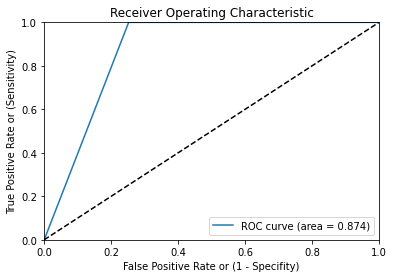

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


In [ ]:
 from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from matplotlib.pyplot import figure
plt.figure(figsize=(12.0,12.0))
AUC1=0

skf = StratifiedKFold(n_splits=2) 
skf.get_n_splits(X, y) #get and split return n split

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    for C in Comtam:
        model = IsolationForest(contamination=C, n_estimators=100)
        model.fit(X_train)
        y_pred=model.predict(X_test)
        y_pred[y_pred>0]=0
        y_pred[y_pred<0]=1
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.subplot(211)
        
        plt.plot(fpr, tpr, label=['ROC curve (area = %0.3f)' % roc_auc,"Contamination :%0.2f"  %C])
        AUC2=roc_auc
        #plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate or (1 - Specifity)')
        plt.ylabel('True Positive Rate or (Sensitivity)')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.subplot(212)
        precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
        plt.plot(recall, precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        
        if AUC2>AUC1:
            AUC1=AUC2
            ContaminationP=C
            



print (ContaminationP)


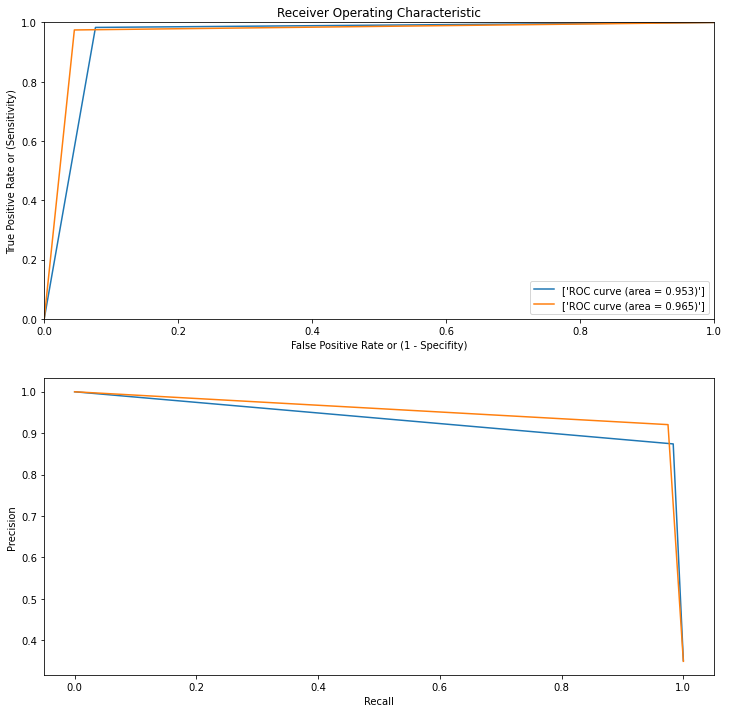

In [6]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from matplotlib.pyplot import figure
plt.figure(figsize=(12.0,12.0))

skf = StratifiedKFold(n_splits=2) 

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    model2 = IsolationForest()
    model2.fit(X_train)
    y_pred=model.predict(X_test)
    y_pred[y_pred>0]=0
    y_pred[y_pred<0]=1
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
    roc_auc2 = metrics.auc(fpr, tpr)
    plt.subplot(211)
    plt.plot(fpr, tpr, label=['ROC curve (area = %0.3f)' % roc_auc2])
    AUC2=roc_auc
    #plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.subplot(212)
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
